<a href="https://colab.research.google.com/github/Changyoon-Lee/big_contest/blob/jeje/cj%EC%98%AC%EB%A6%AC%EB%B8%8C_%EB%AC%BC%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

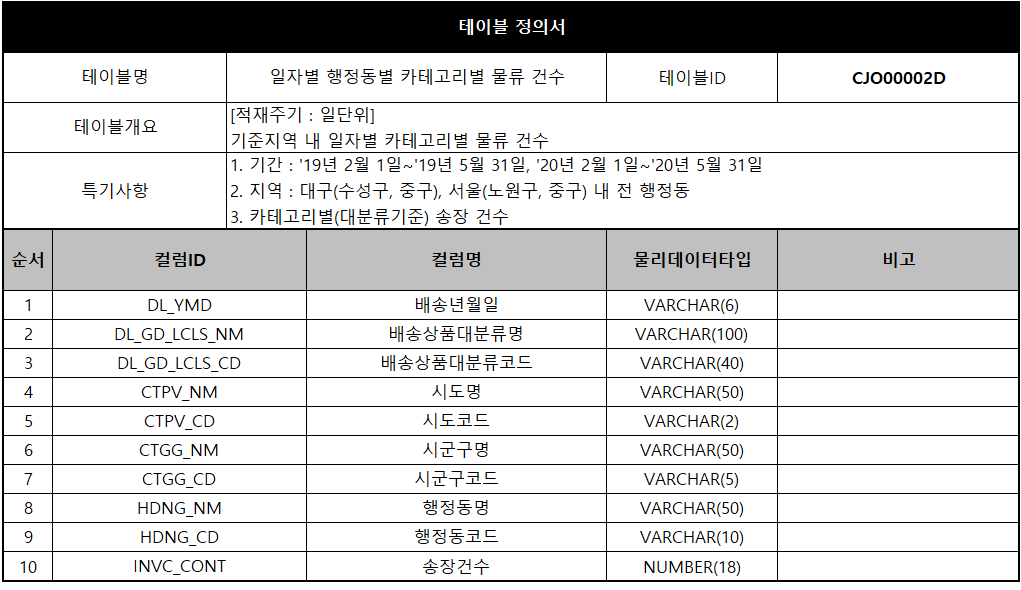

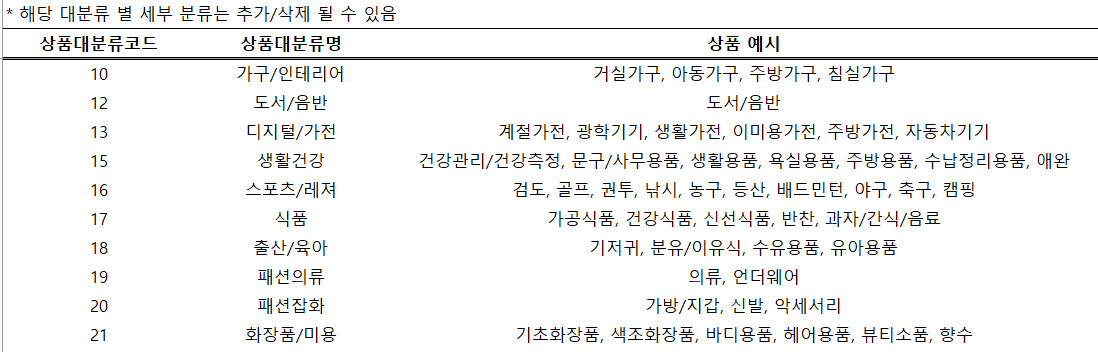

- 업종별로 분석해보기 
- 월별

# 원본 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
cj = pd.read_csv('/content/drive/My Drive/모공전/빅콘/CJ올리브네트웍스/cj.csv')
cj

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


In [ ]:
cj['DL_YMD'].dtype

dtype('int64')

In [ ]:
cj['DL_YMD'] = cj['DL_YMD'].astype(str)
cj['DL_YMD']

0         190201
1         190201
2         190201
3         190201
4         190201
           ...  
156566    200531
156567    200531
156568    200531
156569    200531
156570    200531
Name: DL_YMD, Length: 156571, dtype: object

In [ ]:
cj['DL_YMD'].dtype

dtype('<M8[ns]')

In [ ]:
from datetime import datetime
cj['DL_YMD'] = pd.to_datetime(cj['DL_YMD'], format='%y%m%d')
cj['DL_YMD']

0        2019-02-01
1        2019-02-01
2        2019-02-01
3        2019-02-01
4        2019-02-01
            ...    
156566   2020-05-31
156567   2020-05-31
156568   2020-05-31
156569   2020-05-31
156570   2020-05-31
Name: DL_YMD, Length: 156571, dtype: datetime64[ns]

In [ ]:
cj.to_csv('cj_dated.csv', index=False)
cj = pd.read_csv('cj_dated.csv')
cj

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,2019-02-01,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,2019-02-01,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,2019-02-01,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,2019-02-01,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
156566,2020-05-31,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
156567,2020-05-31,패션의류,19,서울특별시,11,중구,14,약수동,635,21
156568,2020-05-31,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
156569,2020-05-31,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


# 한글 폰트 적용

In [ ]:
from matplotlib import font_manager,rc
from matplotlib import font_manager as fm
path="/content/drive/My Drive/code/NanumBarunGothic.ttf"
fontprop=fm.FontProperties(fname=path,size=18)

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
!apt-get update -qq
!apt-get install fonts-nanum* -qq 

Selecting previously unselected package fonts-nanum.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

sys_font number: 48
nanum_font number: 31
NanumGothic


# 파일 불러오기

In [ ]:
import pandas as pd
cj = pd.read_csv('/content/drive/My Drive/모공전/빅콘/CJ올리브네트웍스/cj_dated.csv')
cj

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,year,month
0,2019-02-01,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,2019,2
1,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,2019,2
2,2019-02-01,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,2019,2
3,2019-02-01,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,2019,2
4,2019-02-01,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...
156566,2020-05-31,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22,2020,5
156567,2020-05-31,패션의류,19,서울특별시,11,중구,14,약수동,635,21,2020,5
156568,2020-05-31,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14,2020,5
156569,2020-05-31,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25,2020,5


In [ ]:
cj.shape

(156571, 12)

In [ ]:
cj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   DL_YMD         156571 non-null  object
 1   DL_GD_LCLS_NM  156571 non-null  object
 2   DL_GD_LCLS_CD  156571 non-null  int64 
 3   CTPV_NM        156571 non-null  object
 4   CTPV_CD        156571 non-null  int64 
 5   CTGG_NM        156571 non-null  object
 6   CTGG_CD        156571 non-null  int64 
 7   HDNG_NM        156571 non-null  object
 8   HDNG_CD        156571 non-null  int64 
 9   INVC_CONT      156571 non-null  int64 
 10  year           156571 non-null  int64 
 11  month          156571 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 14.3+ MB


In [ ]:
print(cj['DL_GD_LCLS_NM'].nunique())
print(cj['DL_GD_LCLS_NM'].unique())

10
['도서/음반' '가구/인테리어' '디지털/가전' '스포츠/레저' '패션잡화' '식품' '생활건강' '패션의류' '화장품/미용'
 '출산/육아']


In [ ]:
# year 빼기
# cj['DL_YMD']=pd.to_datetime(cj['DL_YMD'])
# cj['month']= [i.strftime('%m') for i in cj['DL_YMD']]
# cj['year']= [i.strftime('%Y') for i in cj['DL_YMD']]
# cj.to_csv('cj_dated.csv', index=False)

# 서울

In [ ]:
seoul_2019 = cj[(cj['year']==2019)&(cj['CTPV_NM']=='서울특별시')]
seoul_2020 = cj[(cj['year']==2020)&(cj['CTPV_NM']=='서울특별시')]

In [ ]:
seoul_2019.reset_index(drop=True, inplace=True)
seoul_2020.reset_index(drop=True, inplace=True)

In [ ]:
amt_seoul_2019=seoul_2019.groupby(['year', 'month', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD'],as_index=False).sum()
amt_seoul_2020=seoul_2020.groupby(['year', 'month', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD'],as_index=False).sum()

In [ ]:
amt_seoul_2019.groupby(['year', 'month', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD']).sum()
amt_seoul_2020.groupby(['year', 'month', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD']).sum()
amt_seoul_total = amt_seoul_2019.append(amt_seoul_2020)
amt_seoul_total['rate'] = round(((amt_seoul_2020['INVC_CONT']-amt_seoul_2019['INVC_CONT'])/amt_seoul_2019['INVC_CONT'])*100, 2)
amt_seoul_total.drop(['CTPV_CD', 'CTGG_CD', 'HDNG_CD'], axis=1, inplace=True)

In [ ]:
amt_seoul_total.reset_index(drop=True, inplace=True)
amt_seoul_total

,year,month,DL_GD_LCLS_NM,DL_GD_LCLS_CD,INVC_CONT,rate
0,2019,2,가구/인테리어,10,34149,20.38
1,2019,2,도서/음반,12,61865,36.13
2,2019,2,디지털/가전,13,83393,21.63
3,2019,2,생활건강,15,174190,68.88
4,2019,2,스포츠/레저,16,11067,3.70
...,...,...,...,...,...,...
75,2020,5,식품,17,356023,31.00
76,2020,5,출산/육아,18,7167,3.57
77,2020,5,패션의류,19,325701,13.47
78,2020,5,패션잡화,20,115496,13.41


Text(0, 0.5, '증가량')

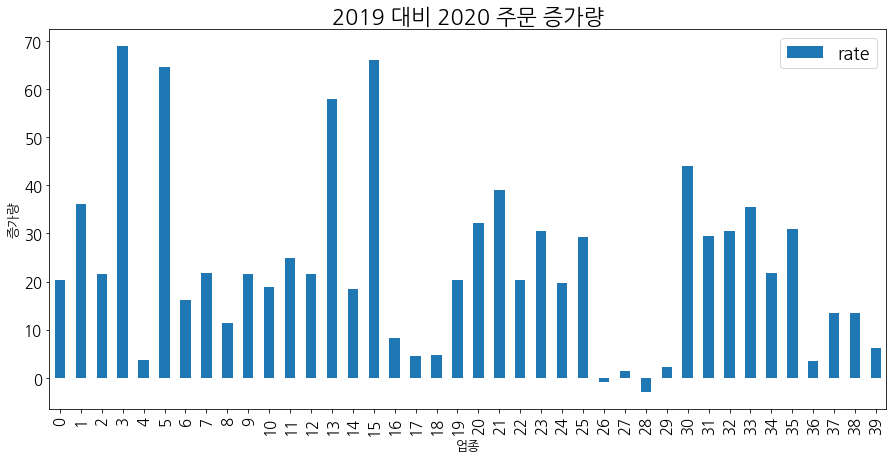

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic', size=18)
ax = amt_seoul_total['rate'][:40].plot(kind='bar', title='2019 대비 2020 주문 증가량', figsize=(15, 7), legend=True, fontsize=15)
ax.set_xlabel('업종', fontsize=13)         # x축 정보 표시
ax.set_ylabel('증가량', fontsize=13)     # y축 정보 표시

In [ ]:
amt_seoul_total.iloc[26:30]

,year,month,DL_GD_LCLS_NM,DL_GD_LCLS_CD,INVC_CONT,rate
26,2019,4,출산/육아,18,6474,-0.80
27,2019,4,패션의류,19,273500,1.34
28,2019,4,패션잡화,20,99346,-2.96
29,2019,4,화장품/미용,21,145036,2.22


- 위의 막대 그래프는 월별 업종별 작년 대비 송장량 증가량을 나타냄.
- 보면 **2월에 생활건강과 식품, 3월 생활건강과 식품**이 특히 높음을 알 수 있다.
- 4월은 필수품 아닌것은 감소한 느낌이 있는 반면에 그 중에서도 스포츠/레저 이런것들은 증가했다는 것을 염두에 둘만함

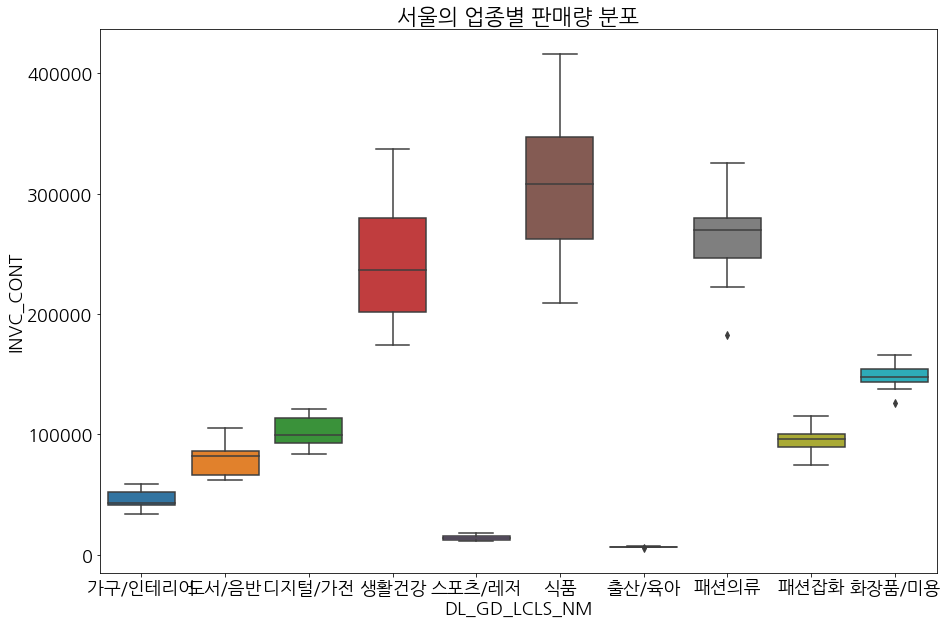

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(amt_seoul_total['DL_GD_LCLS_NM'], amt_seoul_total['INVC_CONT'])
plt.title("서울의 업종별 판매량 분포")
plt.show()

In [ ]:
month_list=list(set(amt_seoul_total['month']))
std_list=list(set(amt_seoul_total['DL_GD_LCLS_NM']))
cnt_list=list(set(amt_seoul_total['INVC_CONT']))

In [ ]:
std_list

['화장품/미용',
 '도서/음반',
 '생활건강',
 '패션잡화',
 '디지털/가전',
 '패션의류',
 '가구/인테리어',
 '식품',
 '출산/육아',
 '스포츠/레저']

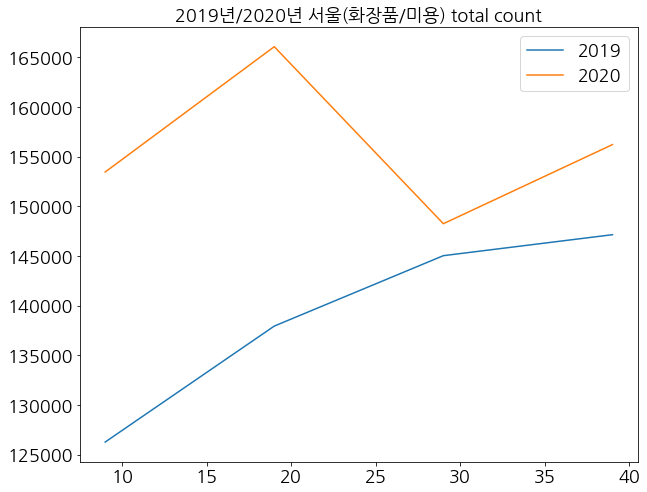

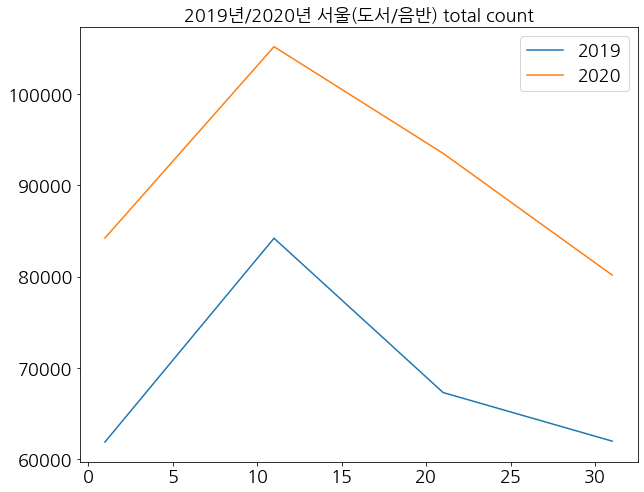

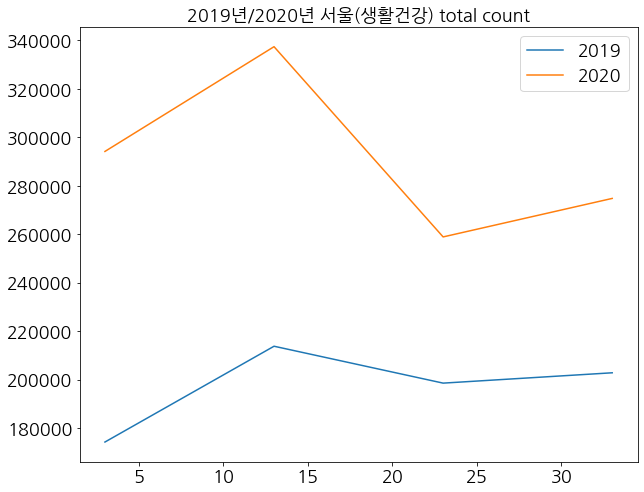

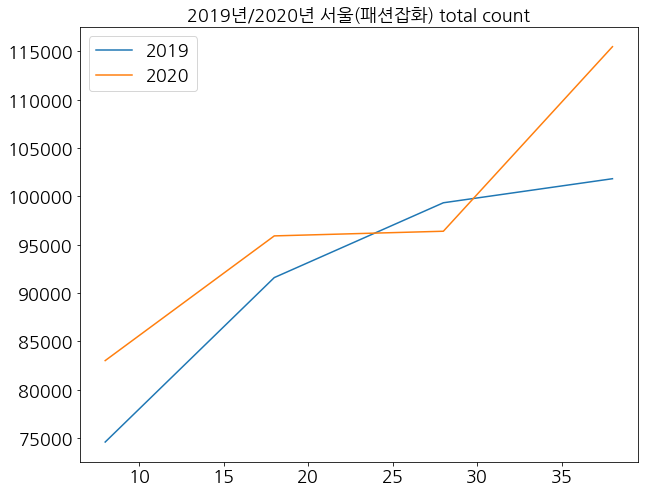

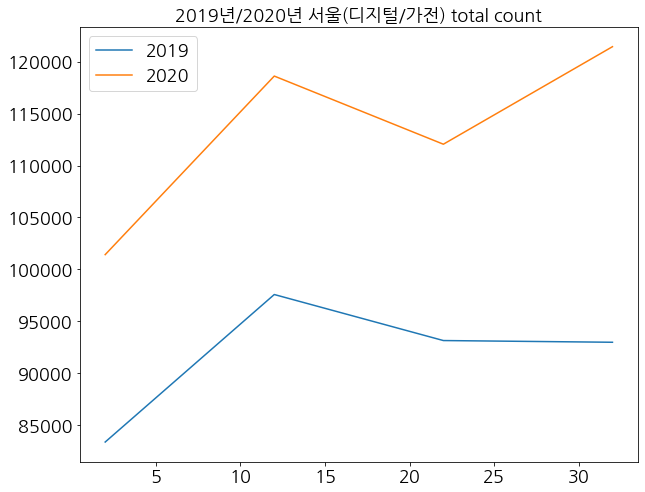

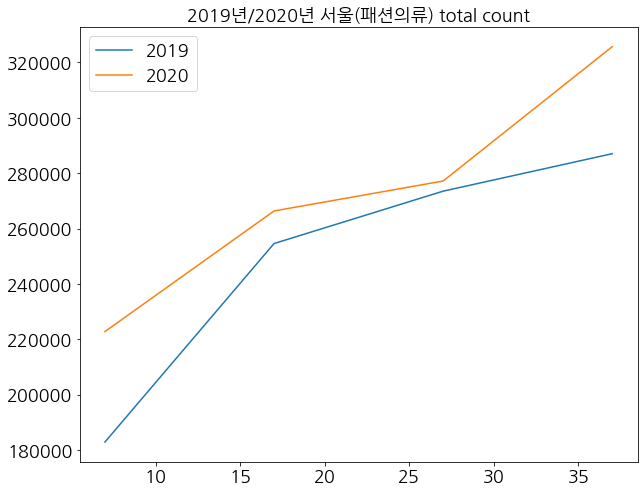

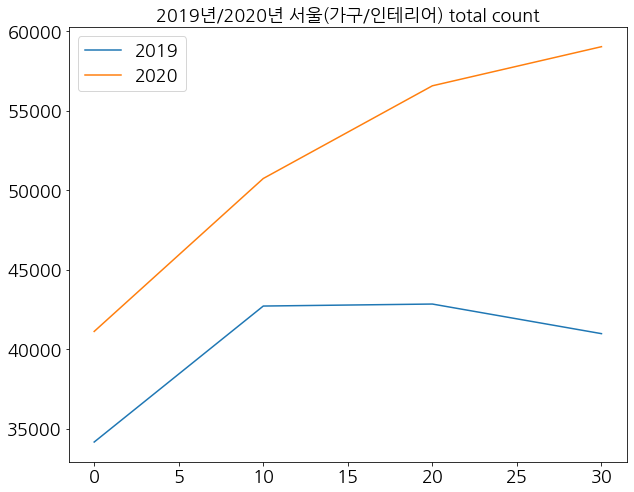

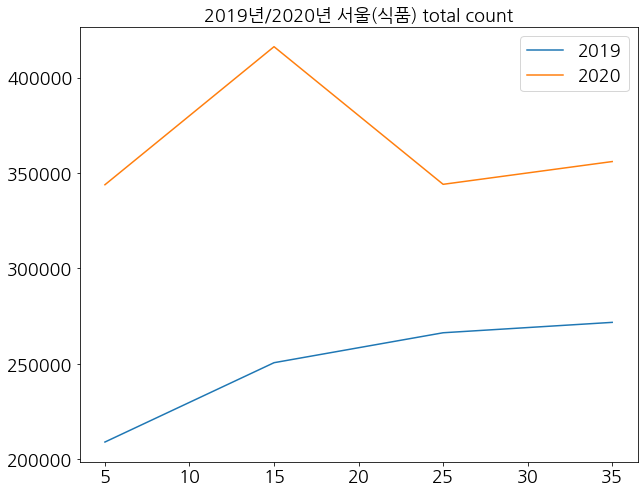

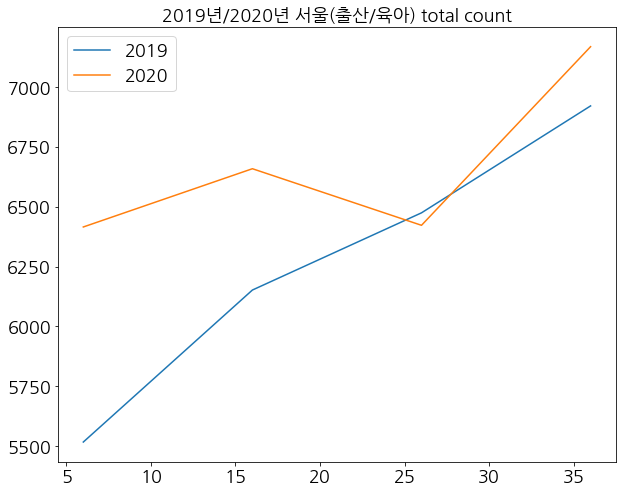

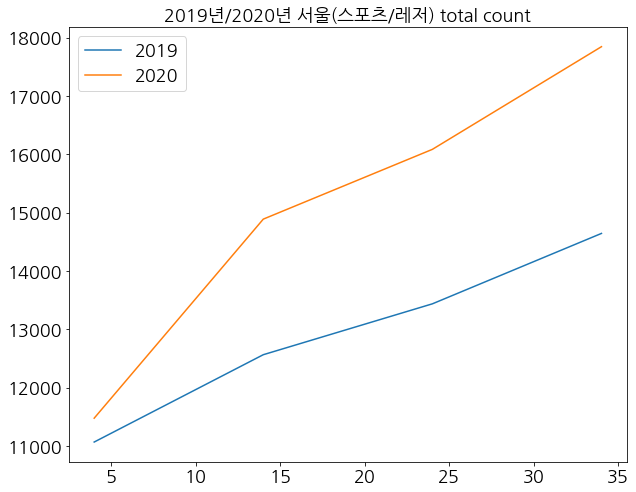

In [ ]:
for i in range(len(std_list)):
  amt_seoul_2019[amt_seoul_2019['DL_GD_LCLS_NM']==std_list[i]]['INVC_CONT'].plot(figsize=(10, 8))
  amt_seoul_2020[amt_seoul_2020['DL_GD_LCLS_NM']==std_list[i]]['INVC_CONT'].plot(figsize=(10, 8))
  plt.title('2019년/2020년 서울({}) total count'.format(std_list[i]),fontproperties='NanumGothic')
  plt.legend(['2019', '2020'])
  plt.show()

- x축은 2/3/4/5 월 입니다. (꺾는점 4개인거 볼 수 있음)

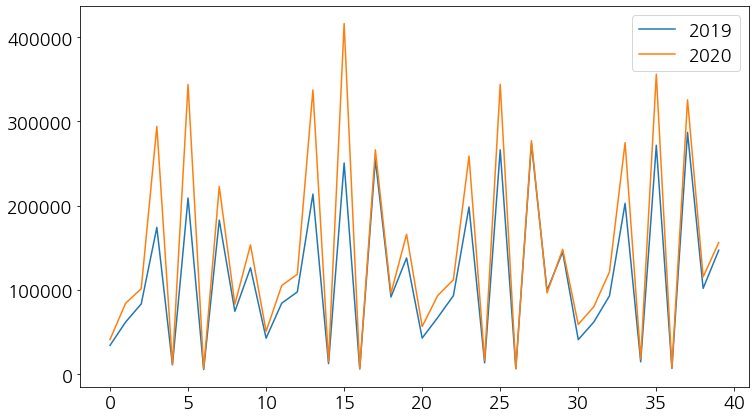

In [ ]:
### 연도별 전체로 보려면 이런 식으로 나옴 ###
amt_seoul_2019['INVC_CONT'].plot(figsize=(12, 7))
amt_seoul_2020['INVC_CONT'].plot(figsize=(12, 7))
plt.legend(['2019', '2020'])
plt.show()

In [ ]:
amt_seoul_2020[10:20]

,year,month,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_CD,CTGG_CD,HDNG_CD,INVC_CONT
10,2020,3,가구/인테리어,10,11308,26572,640603,50732
11,2020,3,도서/음반,12,11594,27125,656797,105186
12,2020,3,디지털/가전,13,11583,27090,656077,118609
13,2020,3,생활건강,15,11594,27125,656797,337433
14,2020,3,스포츠/레저,16,10417,24493,590008,14888
15,2020,3,식품,17,11594,27125,656797,416201
16,2020,3,출산/육아,18,8822,21287,501447,6658
17,2020,3,패션의류,19,11594,27125,656797,266347
18,2020,3,패션잡화,20,11572,27097,655567,95919
19,2020,3,화장품/미용,21,11594,27125,656797,166072


In [ ]:
print(list(set(amt_seoul_total['DL_GD_LCLS_NM'])))

['화장품/미용', '도서/음반', '생활건강', '패션잡화', '디지털/가전', '패션의류', '가구/인테리어', '식품', '출산/육아', '스포츠/레저']


# 대구

In [ ]:
cj.groupby(cj['CTPV_NM'])['INVC_CONT'].sum()

CTPV_NM
대구광역시     7393506
서울특별시    10431968
Name: INVC_CONT, dtype: int64

In [ ]:
daegu_2019 = cj[(cj['year']==2019)&(cj['CTPV_NM']=='대구광역시')]
daegu_2020 = cj[(cj['year']==2020)&(cj['CTPV_NM']=='대구광역시')]

In [ ]:
daegu_2019.reset_index(drop=True, inplace=True)
daegu_2020.reset_index(drop=True, inplace=True)

In [ ]:
amt_daegu_2019=daegu_2019.groupby(['year', 'month', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD'],as_index=False).sum()
amt_daegu_2020=daegu_2020.groupby(['year', 'month', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD'],as_index=False).sum()

In [ ]:
amt_daegu_2019.drop(['CTPV_CD', 'CTGG_CD', 'HDNG_CD'], axis=1, inplace=True)
amt_daegu_2020.drop(['CTPV_CD', 'CTGG_CD', 'HDNG_CD'], axis=1, inplace=True)

In [ ]:
amt_daegu_total = amt_daegu_2019.append(amt_daegu_2020)
amt_daegu_total['rate'] = round(((amt_daegu_2020['INVC_CONT']-amt_daegu_2019['INVC_CONT'])/amt_daegu_2019['INVC_CONT'])*100, 2)
# amt_daegu_total.drop(['CTPV_CD', 'CTGG_CD', 'HDNG_CD'], axis=1, inplace=True)

In [ ]:
year_list = list(set(amt_daegu_total['year']))
month_list = list(set(amt_daegu_total['month']))
std_list = list(set(amt_daegu_total['DL_GD_LCLS_NM']))
cnt_list = list(set(amt_daegu_total['INVC_CONT']))

In [ ]:
amt_daegu_total.reset_index(drop=True, inplace=True)
amt_daegu_total

,year,month,DL_GD_LCLS_NM,DL_GD_LCLS_CD,INVC_CONT,rate
0,2019,2,가구/인테리어,10,24351,14.17
1,2019,2,도서/음반,12,55049,33.74
2,2019,2,디지털/가전,13,52580,20.75
3,2019,2,생활건강,15,124657,84.17
4,2019,2,스포츠/레저,16,7800,6.40
...,...,...,...,...,...,...
75,2020,5,식품,17,248974,44.65
76,2020,5,출산/육아,18,5219,12.89
77,2020,5,패션의류,19,233135,23.34
78,2020,5,패션잡화,20,78646,19.88


Text(0, 0.5, '증가량')

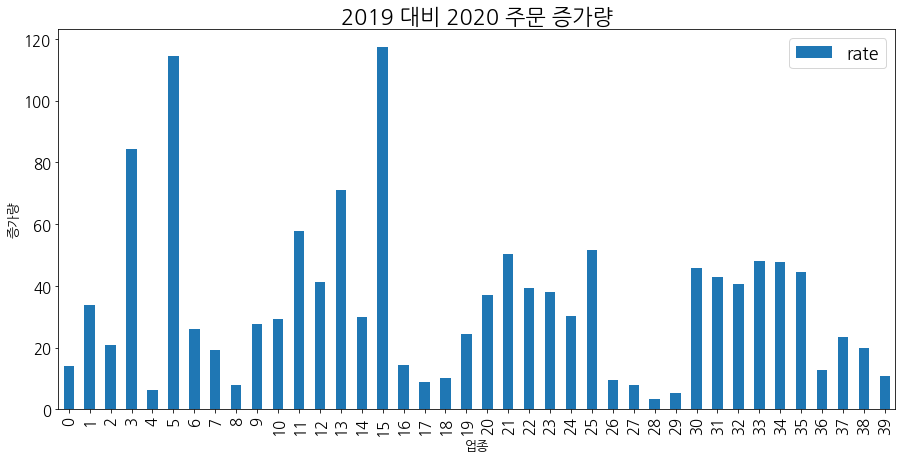

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic', size=18)
ax = amt_daegu_total['rate'][:40].plot(kind='bar', title='2019 대비 2020 주문 증가량', figsize=(15, 7), legend=True, fontsize=15)
ax.set_xlabel('업종', fontsize=13)         # x축 정보 표시
ax.set_ylabel('증가량', fontsize=13)

- 대구 역시 **생활건강, 식품** 이 높고 2, 3월의 소비량이 4, 5월보다 전반적으로 높음

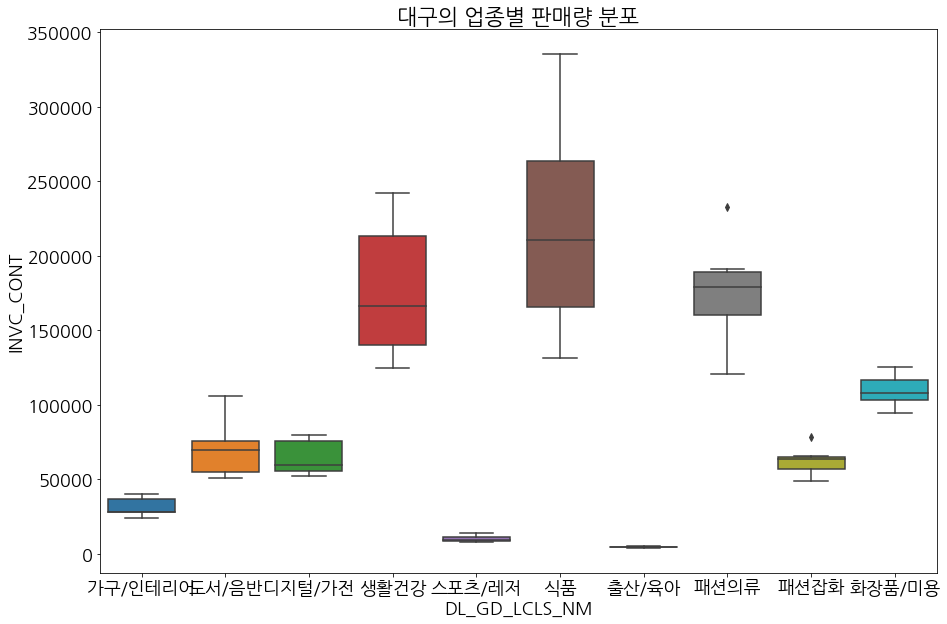

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(amt_daegu_total['DL_GD_LCLS_NM'], amt_daegu_total['INVC_CONT'])
plt.title("대구의 업종별 판매량 분포")
plt.show()

In [ ]:
std_list = list(set(amt_daegu_total['DL_GD_LCLS_NM']))

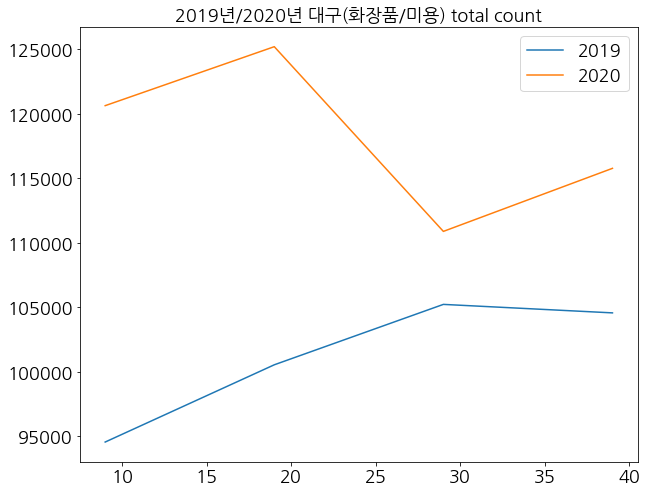

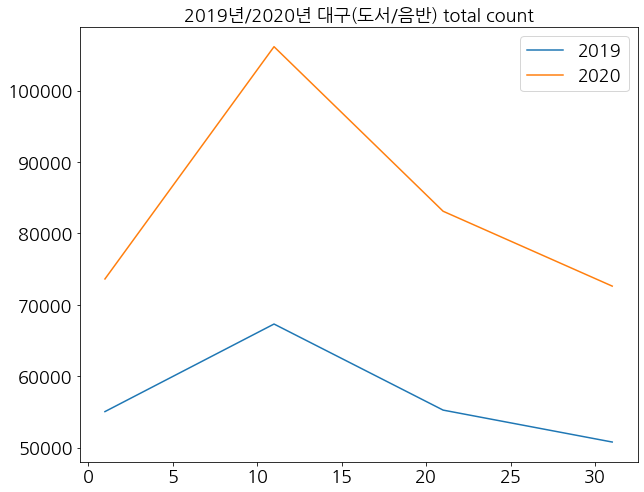

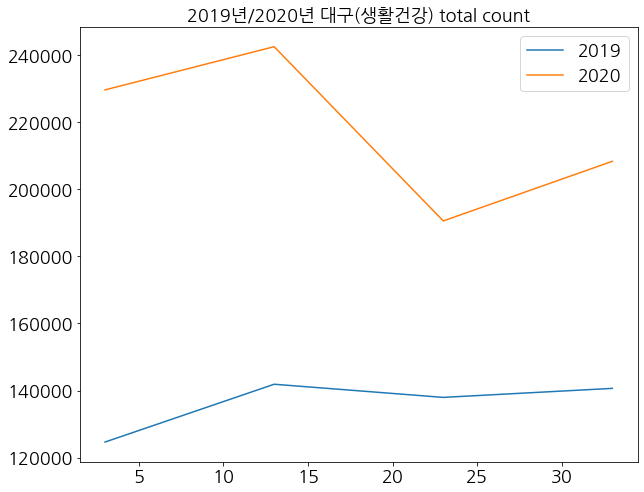

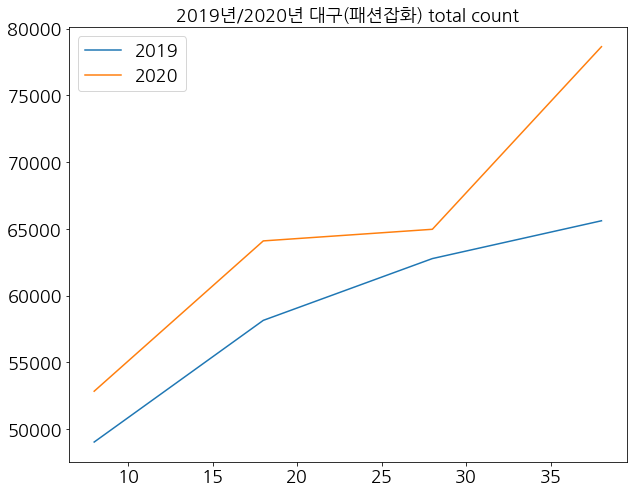

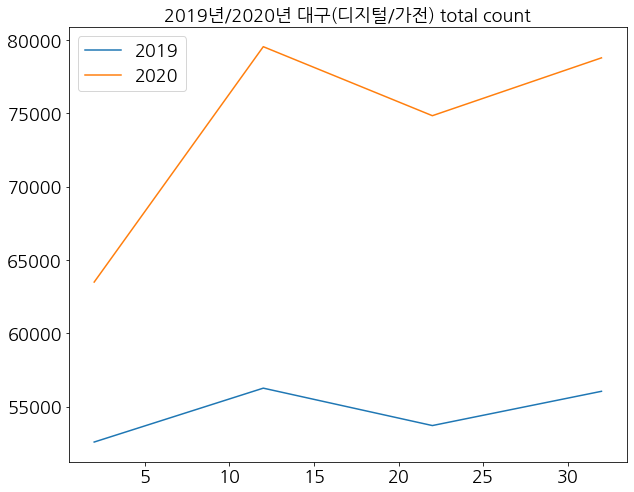

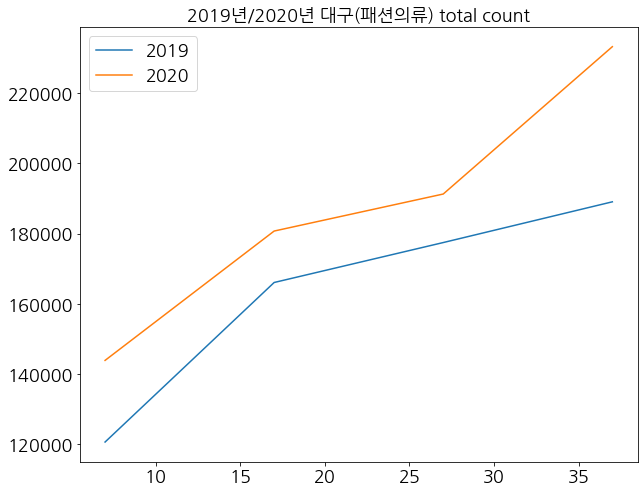

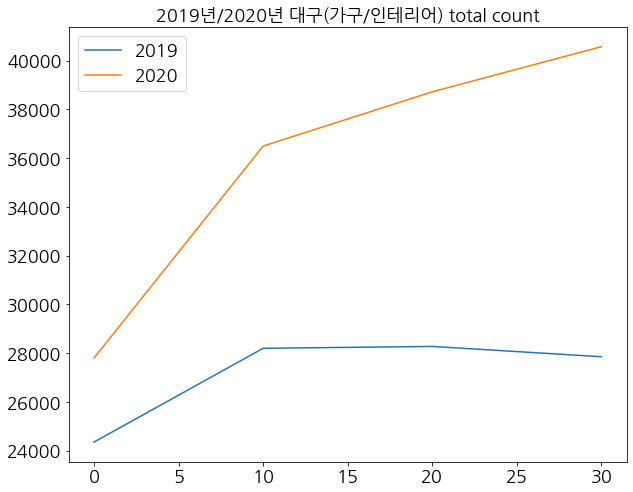

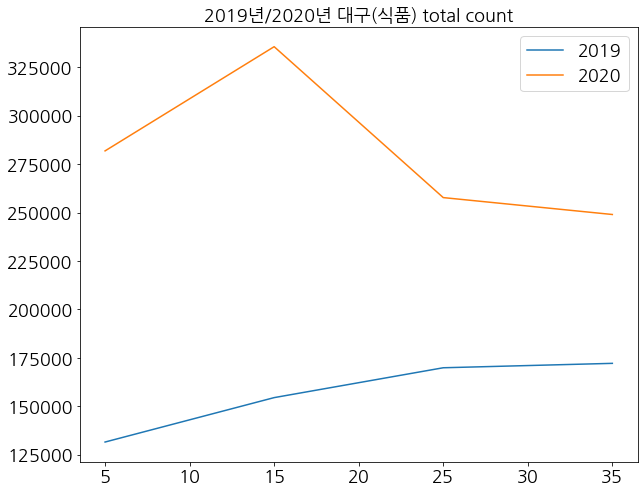

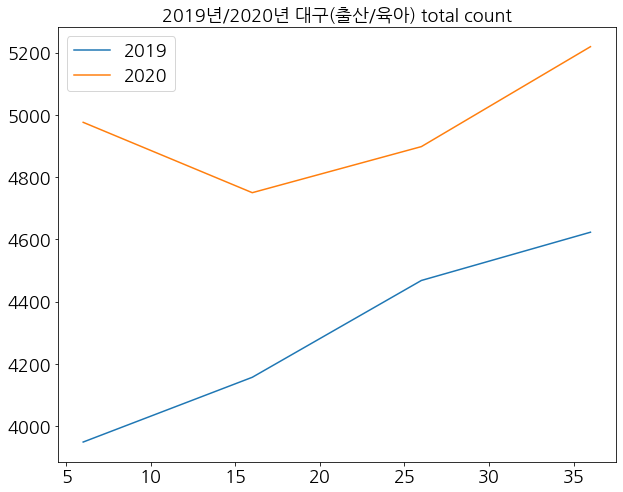

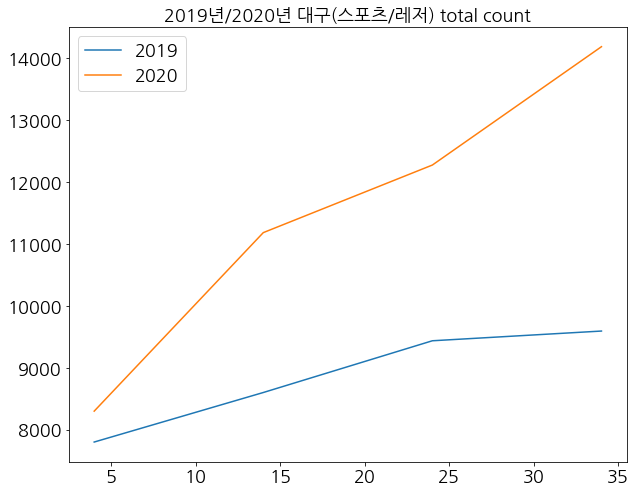

In [ ]:
for i in range(len(std_list)):
  amt_daegu_2019[amt_daegu_2019['DL_GD_LCLS_NM']==std_list[i]]['INVC_CONT'].plot(figsize=(10, 8))
  amt_daegu_2020[amt_daegu_2020['DL_GD_LCLS_NM']==std_list[i]]['INVC_CONT'].plot(figsize=(10, 8))
  plt.title('2019년/2020년 대구({}) total count'.format(std_list[i]),fontproperties='NanumGothic')
  plt.legend(['2019', '2020'])
  plt.show()

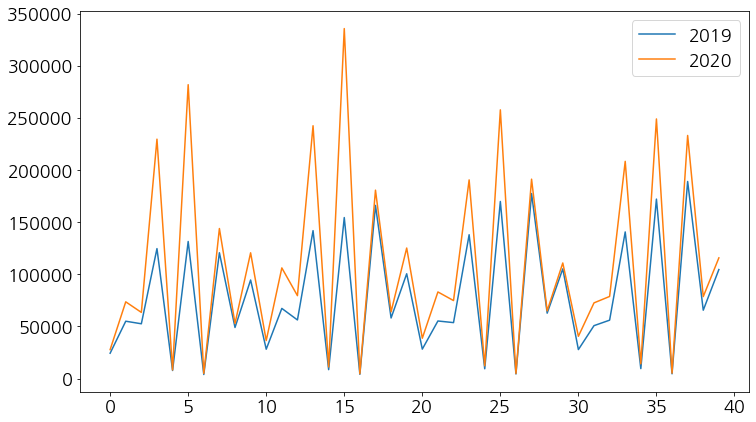

In [ ]:
amt_daegu_2019['INVC_CONT'].plot(figsize=(12, 7))
amt_daegu_2020['INVC_CONT'].plot(figsize=(12, 7))
plt.legend(['2019', '2020'])
plt.show()

In [ ]:
print(std_list)

['화장품/미용', '도서/음반', '생활건강', '패션잡화', '디지털/가전', '패션의류', '가구/인테리어', '식품', '출산/육아', '스포츠/레저']


In [ ]:
amt_daegu_2020[10:20]

,year,month,DL_GD_LCLS_NM,DL_GD_LCLS_CD,INVC_CONT
10,2020,3,가구/인테리어,10,36498
11,2020,3,도서/음반,12,106150
12,2020,3,디지털/가전,13,79546
13,2020,3,생활건강,15,242453
14,2020,3,스포츠/레저,16,11183
15,2020,3,식품,17,335618
16,2020,3,출산/육아,18,4750
17,2020,3,패션의류,19,180700
18,2020,3,패션잡화,20,64098
19,2020,3,화장품/미용,21,125208


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import matplotlib.pyplot as plt
std_list = list(set(cj['DL_GD_LCLS_NM']))

In [ ]:
def si_std_amt(std):
  simple_AMT=cj[['DL_GD_LCLS_NM','CTPV_NM', 'INVC_CONT']]
  whole_AMT=simple_AMT.groupby(['DL_GD_LCLS_NM','CTPV_NM']).agg(['sum']).reset_index()
  whole_AMT.columns=['DL_GD_LCLS_NM','CTPV_NM','INVC_CONT']
  if std.lower() == 'all':
    f, axes = plt.subplots(4,5, sharex=False, sharey=False,figsize=(30,30))
    for idx, i in enumerate(std_list):
      data=whole_AMT[whole_AMT['DL_GD_LCLS_NM']==i]
      data_x=data['INVC_CONT']
      col=idx//5
      row=idx%5      
      plt.rc('font', family='NanumGothic', size=18)
      axes[col,row].pie(data_x,labels=['Daegu', 'Seoul'], autopct='%.1f%%',shadow=True)
      axes[col,row].set_title('{} 송장 건수'.format(i)) 
    plt.show()
  else:
     plt.figure(figsize=(10,10))
     data=whole_AMT[whole_AMT['DL_GD_LCLS_NM']==std]
     data_x=data['INVC_CONT']
     plt.rc('font', family='NanumGothic', size=18)
     plt.pie(data_x,labels=['Daegu', 'Seoul'], autopct='%.1f%%',shadow=True)
     plt.title('{} 송장 건수'.format(std)) 
     plt.show()

In [ ]:
print(std_list)

['패션의류', '도서/음반', '패션잡화', '스포츠/레저', '디지털/가전', '출산/육아', '생활건강', '식품', '가구/인테리어', '화장품/미용']


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_

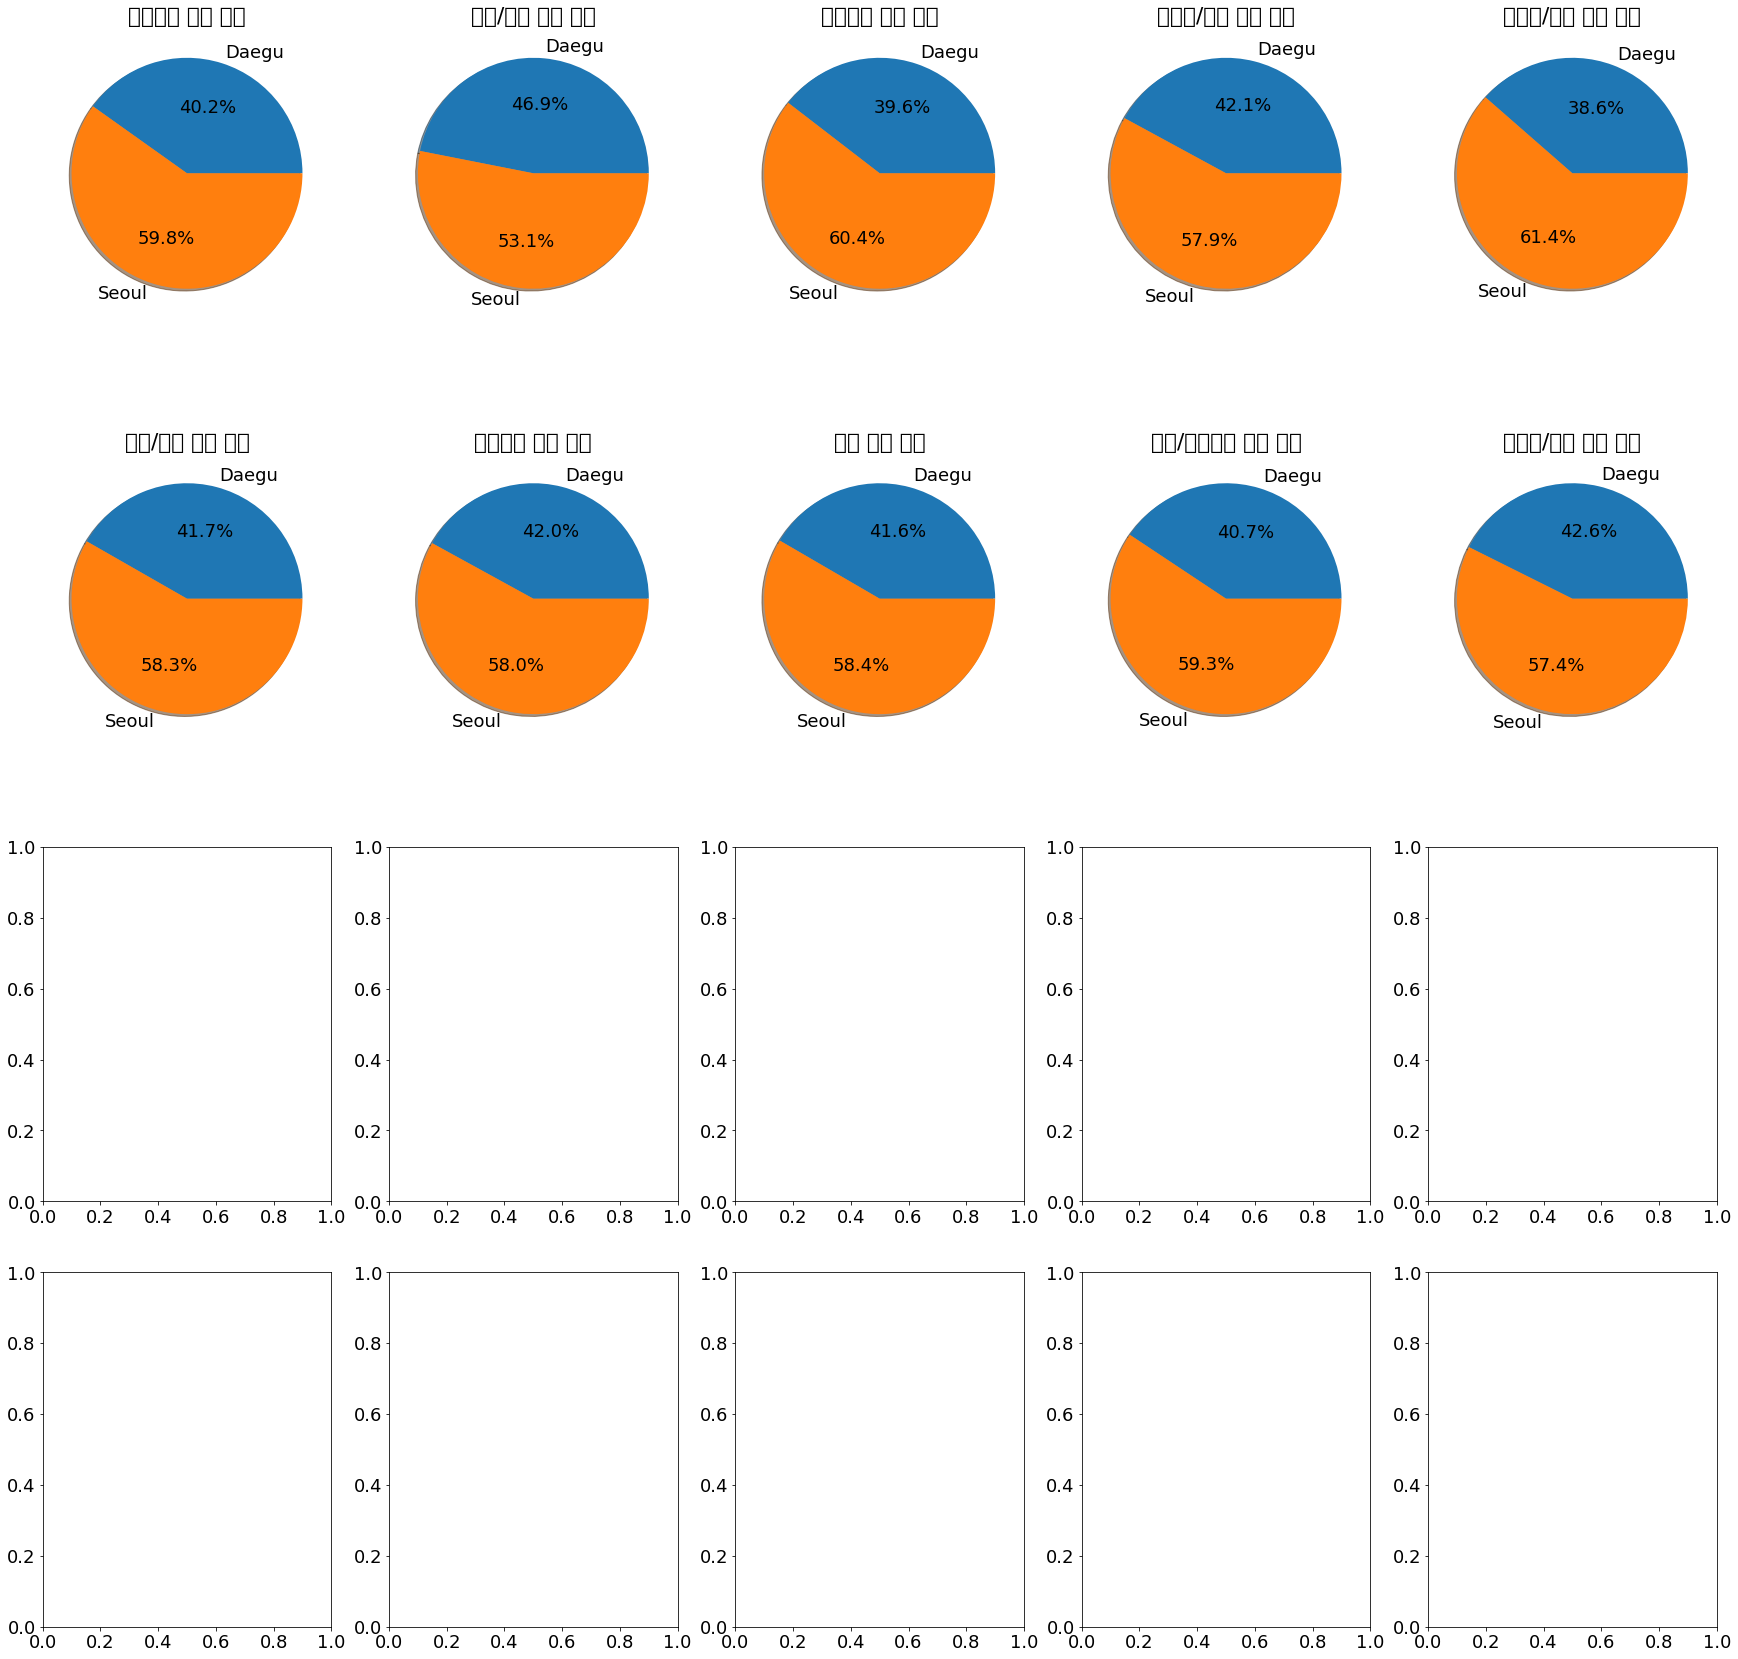

In [ ]:
### 갑자기 한글폰트 적용이 안됨 ㅠㅠ ###
### 위의 std_list 순입니다 ###
si_std_amt('all')